In [ ]:
# Change run time type and select GPU mode

!pip install face-recognition

     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=6eee86fce44c7190c56e4902bd7252be67c4cdcc765bc61c33faffff6009c8a9
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import openpyxl
import datetime
import csv

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [ ]:
print(face_recognition.__version__)
print(cv2.__version__)
print(np.__version__)

1.2.3
4.1.2
1.21.5


# **Face Identification From Images**

In [ ]:
path = "Images/train_img"

images = []

classnames = []

myList = os.listdir(path=path)


In [ ]:
print(myList)

['taneem31-2.jpg', 'taneem31-3.jpg', 'taneem31-4.jpg', 'taneem31-5.jpg', 'rita15-2.jpg', 'alamin30-5.jpg', 'alamin30-2.jpg', 'alamin30-3.jpg', 'alamin30-4.jpg', 'rita15-3.jpg', 'rita15-4.jpg', 'rita15-5.jpg', 'taneem31-1.jpg', 'alamin30-1.jpg', 'rita15-1.jpg']


In [ ]:
for img in myList:
    currentImg = cv2.imread(filename=f"{path}/{img}")
    # if currentImg.shape[0] > 600 and currentImg.shape[1] > 600:
    #     currentImg = cv2.resize(src=currentImg, dsize=(600, 600))

    images.append(currentImg)

    splitName = img.split('-')[0]
    classnames.append(splitName)

    # only_name = [x.isdigit() for x in img].index(True)
    # classnames.append(img[:only_name])

    # classnames.append(os.path.splitext(only_name)[0])

print("The className: ",classnames)
print("Total Images: ",len(classnames))
print("Images list: ", len(images))

The className:  ['taneem', 'taneem', 'taneem', 'taneem', 'rita', 'alamin', 'alamin', 'alamin', 'alamin', 'rita', 'rita', 'rita', 'taneem', 'alamin', 'rita']
Total Images:  15
Images list:  15


In [ ]:
def findEncodings(images):
    encodeList = []

    for img in images:
        img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(face_image=img)[0]
        encodeList.append(encode)
    return encodeList

In [ ]:
encodeListKnown = findEncodings(images=images)

In [ ]:
print(encodeListKnown)

facesCurrentFrame [(98, 242, 284, 56), (150, 1044, 305, 889), (80, 689, 187, 581)]
************************************************************
faceLoc:  (98, 242, 284, 56)
************************************************************
matches:  [False, False, False, False, False, True, True, True, True, False, False, False, False, True, False]
************************************************************
matchIndex 13
************************************************************
Student Name:  Alamin
************************************************************
faceLoc:  (150, 1044, 305, 889)
************************************************************
matches:  [True, True, True, True, False, False, True, False, True, False, False, False, True, False, False]
************************************************************
matchIndex 2
************************************************************
Student Name:  Taneem
************************************************************
faceLoc:  (80, 6

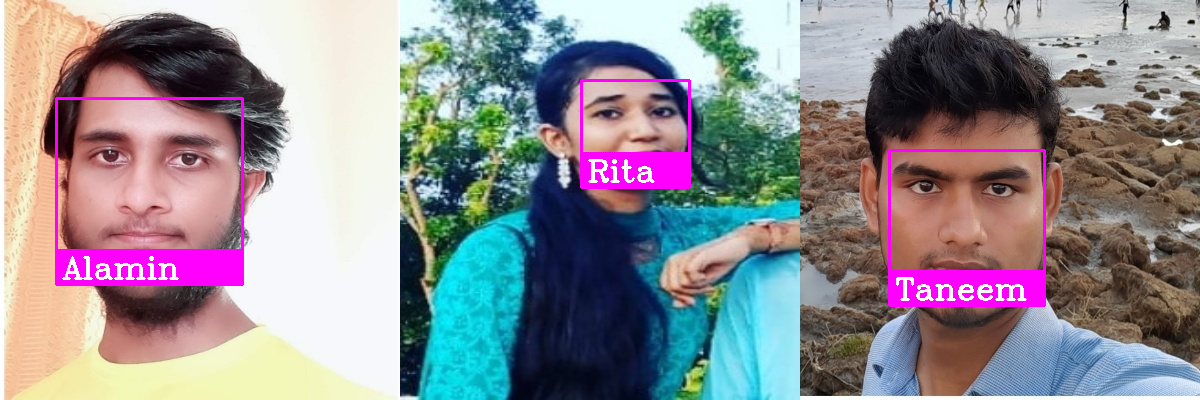

In [ ]:
unknown_img_path = "Images/test_img/joty.jpg"

unknown_face = cv2.imread(filename=unknown_img_path)

unknown_face_RGB = cv2.cvtColor(src=unknown_face, code=cv2.COLOR_BGR2RGB)


facesCurrentFrame = face_recognition.face_locations(img=unknown_face_RGB)
print("facesCurrentFrame",facesCurrentFrame)
print("*"*60)

encodesCurrentFrame = face_recognition.face_encodings(face_image=unknown_face_RGB, known_face_locations=facesCurrentFrame)
# print("encodesCurrentFrame", encodesCurrentFrame)
# print("*"*60)

name = ""

for encodedFace, faceLocations in zip(encodesCurrentFrame, facesCurrentFrame):
    matches = face_recognition.compare_faces(known_face_encodings=encodeListKnown, face_encoding_to_check=encodedFace)

    print("faceLoc: ",faceLocations)
    print("*"*60)

    print("matches: ",matches)
    print("*"*60)
    faceDistance = face_recognition.face_distance(face_encodings=encodeListKnown, face_to_compare=encodedFace)
    
    matchIndex = np.argmin(faceDistance)
    print("matchIndex",matchIndex)
    print("*"*60)

    if matches[matchIndex]:
        name = classnames[matchIndex].capitalize()
        print("Student Name: ", name)
        print("*"*60)

        y1, x2, y2, x1 = faceLocations # faceLoc:  (63, 162, 138, 88)

        # y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4

        cv2.rectangle(img=unknown_face,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)
        cv2.rectangle(img=unknown_face,pt1=(x1, y2-35), pt2=(x2, y2), color=(255,0,255), thickness=cv2.FILLED)
        cv2.putText(img=unknown_face, text=name, org=(x1+6, y2-6), fontFace=cv2.FONT_HERSHEY_COMPLEX,
                    fontScale=1, color=(255,255,255), thickness=2)


cv2_imshow(unknown_face)
cv2.waitKey()
cv2.destroyAllWindows()

# **Face Indetification from Video or Webcam**

In [ ]:
path_video = "Images/train_img"

images_video = []

classnames_video = []

myList_video = os.listdir(path=path_video)

In [ ]:
print(myList_video)

['taneem31-2.jpg', 'taneem31-3.jpg', 'taneem31-4.jpg', 'taneem31-5.jpg', 'rita15-2.jpg', 'alamin30-5.jpg', 'alamin30-2.jpg', 'alamin30-3.jpg', 'alamin30-4.jpg', 'rita15-3.jpg', 'rita15-4.jpg', 'rita15-5.jpg', 'taneem31-1.jpg', 'alamin30-1.jpg', 'rita15-1.jpg']


In [ ]:
for img in myList_video:
    currentImg_video = cv2.imread(filename=f"{path_video}/{img}")
    # if currentImg.shape[0] > 600 and currentImg.shape[1] > 600:
    #     currentImg = cv2.resize(src=currentImg, dsize=(600, 600))

    images_video.append(currentImg_video)
    split_name = img.split('-')[0]
    classnames_video.append(split_name)
    # only_name = [x.isdigit() for x in img].index(True)
    # classnames_video.append(img[:only_name])

    # classnames.append(os.path.splitext(only_name)[0])

print("The className: ", classnames_video)
print("Total Images: ", len(classnames_video))
print("Images list: ",  len(images_video))

The className:  ['taneem31', 'taneem31', 'taneem31', 'taneem31', 'rita15', 'alamin30', 'alamin30', 'alamin30', 'alamin30', 'rita15', 'rita15', 'rita15', 'taneem31', 'alamin30', 'rita15']
Total Images:  15
Images list:  15


In [ ]:
def findEncodings_video(images):
    encodeList_video = []

    for img in images_video:
        img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(face_image=img)[0]
        encodeList_video.append(encode)
    return encodeList_video

In [ ]:
encodeListKnown_video = findEncodings_video(images=images_video)

In [ ]:
# print(encodeListKnown_video)

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
xlsx_path = "demo.xlsx"

wb = openpyxl.load_workbook(xlsx_path)

ws = wb.active

stu_info = {
    'rubel08'   : '2191081008',
    'rita15'   : '2191081015',
    'tanzila16'   : '2191081016',
    'joty26'   : '2191081026',
    'alamin30' : '2191081030',
    'taneem31' : '2191081031'
    
}

stu_lis = []
stu_lis2 = []


def takeAttendance(name):
    name_only = [i.isdigit() for i in name].index(True) # index number '7'
    myName = name[:name_only] # alamin
    cdate, ctime = str(datetime.datetime.now()).split()
    if len(stu_lis) >= 0:
        stuID = stu_info[name] # name = 'alamin30'
        if [myName, stuID, cdate] not in stu_lis:
            stu_lis.append([myName, stuID, cdate])
            stu_lis2.append([myName, stuID, cdate, ctime])
        else:
            pass


# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing your face...'
# initialze bounding box to empty
bbox = ''
count = 0

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image

    # img = js_to_image(js_reply["img"])

    unknown_face = js_to_image(js_reply["img"])
    # print("Unknown Face shape: ",unknown_face.shape)
    # print("Unknown Face ndim: ",unknown_face.ndim)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    # print("bbox_array shape: ",bbox_array.shape)
    # print("bbox_array ndim: ",bbox_array.ndim)
    # print(bbox_array)

    # grayscale image for face detection
    # gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    unknown_face_RGB = cv2.cvtColor(src=unknown_face, code=cv2.COLOR_BGR2RGB)

    facesCurrentFrame = face_recognition.face_locations(img=unknown_face_RGB)
    # print("facesCurrentFrame",facesCurrentFrame)
    # print("*"*60)

    encodesCurrentFrame = face_recognition.face_encodings(face_image=unknown_face_RGB, known_face_locations=facesCurrentFrame)
    # print("encodesCurrentFrame",encodesCurrentFrame)
    # print("*"*60)


    name = ""

    for encodedFace, faceLocation in zip(encodesCurrentFrame, facesCurrentFrame):
        matches = face_recognition.compare_faces(known_face_encodings=encodeListKnown, face_encoding_to_check=encodedFace)

        # print("faceLocation: ",faceLocation)
        # print("*"*60)

        # print("matches: ",matches)
        # print("*"*60)
        faceDistance = face_recognition.face_distance(face_encodings=encodeListKnown, face_to_compare=encodedFace)
        
        matchIndex = np.argmin(faceDistance)

        if matches[matchIndex]:
            name = classnames_video[matchIndex]

            extract_name = [m.isdigit() for m in name].index(True)
            only_name = name[:extract_name].capitalize()

            print("Extract Name: ", only_name)
            # print("*"*60)
            print("Student Name: ", name)
            # print("*"*60)

            y1, x2, y2, x1 = faceLocation # faceLoc:  (63, 162, 138, 88)

            # bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
            bbox_array = cv2.rectangle(img=bbox_array,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)

            cv2.rectangle(img=unknown_face,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)
            cv2.rectangle(img=unknown_face,pt1=(x1, y2-35), pt2=(x2, y2), color=(255,0,255), thickness=cv2.FILLED)
            cv2.putText(img=unknown_face, text=only_name, org=(x1+6, y2-6), fontFace=cv2.FONT_HERSHEY_COMPLEX,
                        fontScale=1, color=(255,255,255), thickness=2)
            
            takeAttendance(name=name)
    
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    # print(bbox_bytes)
    bbox = bbox_bytes

    cv2_imshow(unknown_face)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


print()
print(stu_lis)
print()
print(stu_lis2)

for row in stu_lis2:
    ws.append(row)
    
wb.save(filename=xlsx_path)